Team Members:
> Brandon Hoffman <br>
> Francisco Cardoza<br>
> Ting Lin<br>

Honor Code:
> On my honor, as a student, I have neither given nor received unauthoraized aid on this academic work. 


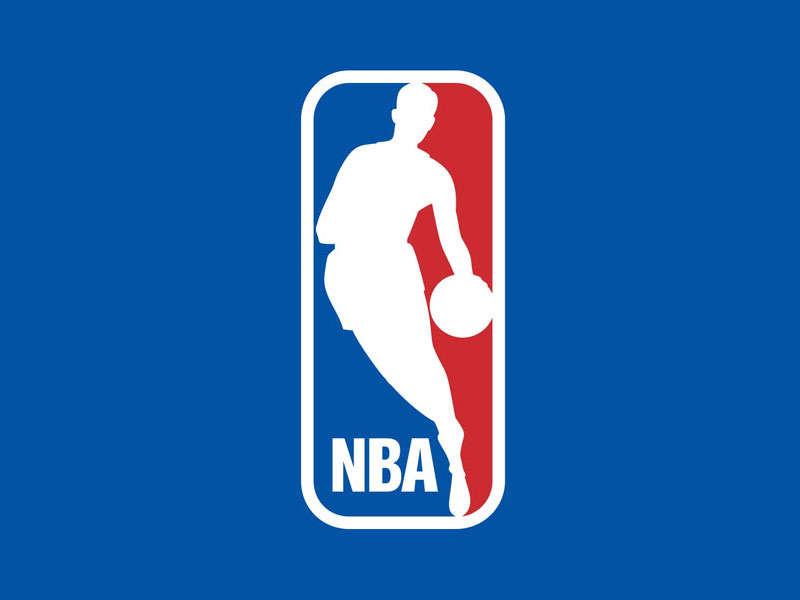

In [4]:
from IPython.display import Image
Image("final_project_nba-master/nba-logo.jpg")
# Source: imgur.com

# Data Identification and Collection

The stats data we will use will be from: <br>
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html <br> 
<br>
The salary data we use will be from:<br>
http://www.espn.com/nba/salaries/_/year/2017<br> 
<br>
After we scrape our data from these two sites we will join the two tables together before running our analysis.<br>
<br>
Our stats data covers the 2016-1017 NBA season.  <br>
This data is PER GAME data or player stat averages over the entire season. <br>
<br>
The stats data we will extract will be the following:<br>
player - player's name<br>
position - player's position <br>
age - player's age <br>
team - player's team<br> 
games - number of games played during 16-17 season<br>
games_started - number of games started during 16-17 season<br>
mins_per_g - minutes played per game <br>
fg_per_g - field goals per game<br>
fga_per_g - field goal attempts per game<br>
fg_pct - field goal percentage <br>
fg3_per_g - 3 point field goals per game <br>
fg3a_per_g 3 point field goal attempts per game<br>
fg3_pct - 3 point field goal percentage<br>
fg2_per_g - 2 point field goals per game<br>
fg2a_per_g - 2 point field goal attempts per game<br>
fg2_pct - 2 point field goal percentage <br>
efg_pct - effective field goal percentage (stat that adjust for the fact that a 3 point field goal is worth more than 2)<br>
ft_per_g - free throws per game<br>
fta_per_g - free throw attempts per game <br>
ft_pc - free throw percentage <br>
orb_per_g - offensive rebounds <br>
drb_per_g - deffensive rebounds<br>
trb_per_g - total rebounds <br>
ast_per_g - assists <br>
stl_per_g - steals <br>
blk_per_g - blocks <br>
tov_per_g - turnovers <br>
pf_per_g - personal fouls<br>
pts_per_g - points <br>

In [5]:
import requests 
from lxml import html 
import csv
import pandas as pd 

In [6]:
#visit the webpage and access the web contents
r = requests.get('https://www.basketball-reference.com/leagues/NBA_2017_per_game.html')
data = html.fromstring(r.text)

In [7]:
#xpath: collect the specific data you're looking for
player = data.xpath("//tbody/tr/td[@data-stat='player']/a[@href]/text()")
position = data.xpath("//tbody/tr/td[@class='center ']/text()")
age = data.xpath("//tbody/tr/td[@data-stat='age']/text()")
team = data.xpath("//tbody/tr/td[@data-stat='team_id']/a[@href]/text()|//tbody/tr/td[@data-stat='team_id']/text()")
games = data.xpath("//tbody/tr/td[@data-stat='g']/text()")
games_started = data.xpath("//tbody/tr/td[@data-stat='gs']/text()")
mins_per_g = data.xpath("//tbody/tr/td[@data-stat='mp_per_g']/text()")
fg_per_g = data.xpath("//tbody/tr/td[@data-stat='fg_per_g']/text()")
fga_per_g = data.xpath("//tbody/tr/td[@data-stat='fga_per_g']/text()")
fg_pct = data.xpath("//tbody/tr/td[@data-stat='fg_pct']")
fg_pct = [i.text_content() for i in fg_pct]
fg3_per_g = data.xpath("//tbody/tr/td[@data-stat='fg3_per_g']/text()")
fg3a_per_g = data.xpath("//tbody/tr/td[@data-stat='fg3a_per_g']/text()")
fg3_pct = data.xpath("//tbody/tr/td[@data-stat='fg3_pct']")
fg3_pct = [i.text_content() for i in fg3_pct]
fg2_per_g = data.xpath("//tbody/tr/td[@data-stat='fg2_per_g']/text()")
fg2a_per_g = data.xpath("//tbody/tr/td[@data-stat='fg2a_per_g']/text()")
fg2_pct = data.xpath("//tbody/tr/td[@data-stat='fg2_pct']")
fg2_pct = [i.text_content() for i in fg2_pct]
efg_pct = data.xpath("//tbody/tr/td[@data-stat='efg_pct']")
efg_pct = [i.text_content() for i in efg_pct]
ft_per_g = data.xpath("//tbody/tr/td[@data-stat='ft_per_g']/text()")
fta_per_g = data.xpath("//tbody/tr/td[@data-stat='ft_per_g']/text()")
ft_pct = data.xpath("//tbody/tr/td[@data-stat='ft_pct']")
ft_pct = [i.text_content() for i in ft_pct]
orb_per_g = data.xpath("//tbody/tr/td[@data-stat='orb_per_g']/text()")
drb_per_g = data.xpath("//tbody/tr/td[@data-stat='drb_per_g']/text()")
trb_per_g = data.xpath("//tbody/tr/td[@data-stat='trb_per_g']/text()")
ast_per_g = data.xpath("//tbody/tr/td[@data-stat='ast_per_g']/text()")
stl_per_g = data.xpath("//tbody/tr/td[@data-stat='stl_per_g']/text()")
blk_per_g = data.xpath("//tbody/tr/td[@data-stat='blk_per_g']/text()")
tov_per_g = data.xpath("//tbody/tr/td[@data-stat='tov_per_g']/text()")
pf_per_g = data.xpath("//tbody/tr/td[@data-stat='pf_per_g']/text()")
pts_per_g = data.xpath("//tbody/tr/td[@data-stat='pts_per_g']/text()")

In [8]:
#combines all the columns
nba2017 = zip(player, 
              position, 
              age, 
              team, 
              games, 
              games_started, 
              mins_per_g, 
              fg_per_g, 
              fga_per_g, 
              fg_pct, 
              fg3_per_g, 
              fg3a_per_g, 
              fg3_pct, 
              fg2_per_g, 
              fg2a_per_g, 
              fg2_pct, 
              efg_pct, 
              ft_per_g, 
              fta_per_g, 
              ft_pct, 
              orb_per_g, 
              drb_per_g,
              trb_per_g,
              ast_per_g,
              stl_per_g,
              blk_per_g,
              tov_per_g,
              pf_per_g,
              pts_per_g)
#organizing our data structure to a pandas dataframe
df = pd.DataFrame(nba2017)

In [9]:
#renaming the column names 
df = df.rename(columns = {0:'player', 
                          1:'position', 
                          2:'age', 
                          3:'team', 
                          4:'games', 
                          5:'games_started', 
                          6:'mins_per_g', 
                          7:'fg_per_g', 
                          8:'fga_per_g', 
                          9:'fg_pct', 
                          10:'fg3_per_g', 
                          11:'fg3a_per_g', 
                          12:'fg3_pct', 
                          13:'fg2_per_g', 
                          14:'fg2a_per_g', 
                          15:'fg2_pct', 
                          16:'efg_pct', 
                          17:'ft_per_g', 
                          18:'fta_per_g', 
                          19:'ft_pct', 
                          20:'orb_per_g', 
                          21:'drb_per_g',
                          22:'trb_per_g',
                          23:'ast_per_g',
                          24:'stl_per_g',
                          25:'blk_per_g',
                          26:'tov_per_g',
                          27:'pf_per_g',
                          28:'pts_per_g'})
df.head()

,player,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,...,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g
0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,.393,...,.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,.412,...,.750,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8
2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,.294,...,.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2
3,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,.425,...,.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5
4,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,.571,...,.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3


In [10]:
#now we notice our columns aren't numerical values, we need to change this to be able to run data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 29 columns):
player           595 non-null object
position         595 non-null object
age              595 non-null object
team             595 non-null object
games            595 non-null object
games_started    595 non-null object
mins_per_g       595 non-null object
fg_per_g         595 non-null object
fga_per_g        595 non-null object
fg_pct           595 non-null object
fg3_per_g        595 non-null object
fg3a_per_g       595 non-null object
fg3_pct          595 non-null object
fg2_per_g        595 non-null object
fg2a_per_g       595 non-null object
fg2_pct          595 non-null object
efg_pct          595 non-null object
ft_per_g         595 non-null object
fta_per_g        595 non-null object
ft_pct           595 non-null object
orb_per_g        595 non-null object
drb_per_g        595 non-null object
trb_per_g        595 non-null object
ast_per_g        595 non-null object
stl_per

In [11]:
#here we change the data type of every column with numeric values 
df['age'] = pd.to_numeric(df['age'])
df['age'].fillna(0, inplace=True)

df['games'] = pd.to_numeric(df['games'])
df['games'].fillna(0, inplace=True)

df['games_started'] = pd.to_numeric(df['games_started'])
df['games_started'].fillna(0, inplace=True)

df['mins_per_g'] = pd.to_numeric(df['mins_per_g'])
df['mins_per_g'].fillna(0, inplace=True)

df['fg_per_g'] = pd.to_numeric(df['fg_per_g'])
df['fg_per_g'].fillna(0, inplace=True)

df['fga_per_g'] = pd.to_numeric(df['fga_per_g'])
df['fga_per_g'].fillna(0, inplace=True)

df['fg_pct'] = pd.to_numeric(df['fg_pct'])
df['fg_pct'].fillna(0, inplace=True)

df['fg3_per_g'] = pd.to_numeric(df['fg3_per_g'])
df['fg3_per_g'].fillna(0, inplace=True)

df['fg3a_per_g'] = pd.to_numeric(df['fg3a_per_g'])
df['fg3a_per_g'].fillna(0, inplace=True)

df['fg3_pct'] = pd.to_numeric(df['fg3_pct'])
df['fg3_pct'].fillna(0, inplace=True)

df['fg2_per_g'] = pd.to_numeric(df['fg2_per_g'])
df['fg2_per_g'].fillna(0, inplace=True)

df['fg2a_per_g'] = pd.to_numeric(df['fg2a_per_g'])
df['fg2a_per_g'].fillna(0, inplace=True)

df['fg2_pct'] = pd.to_numeric(df['fg2_pct'])
df['fg2_pct'].fillna(0, inplace=True)

df['efg_pct'] = pd.to_numeric(df['efg_pct'])
df['efg_pct'].fillna(0, inplace=True)

df['ft_per_g'] = pd.to_numeric(df['ft_per_g'])
df['ft_per_g'].fillna(0, inplace=True)

df['fta_per_g'] = pd.to_numeric(df['fta_per_g'])
df['fta_per_g'].fillna(0, inplace=True)

df['ft_pct'] = pd.to_numeric(df['ft_pct'])
df['ft_pct'].fillna(0, inplace=True)

df['orb_per_g'] = pd.to_numeric(df['orb_per_g'])
df['orb_per_g'].fillna(0, inplace=True)

df['drb_per_g'] = pd.to_numeric(df['drb_per_g'])
df['drb_per_g'].fillna(0, inplace=True)

df['trb_per_g'] = pd.to_numeric(df['trb_per_g'])
df['trb_per_g'].fillna(0, inplace=True)

df['ast_per_g'] = pd.to_numeric(df['ast_per_g'])
df['ast_per_g'].fillna(0, inplace=True)

df['stl_per_g'] = pd.to_numeric(df['stl_per_g'])
df['stl_per_g'].fillna(0, inplace=True)

df['blk_per_g'] = pd.to_numeric(df['blk_per_g'])
df['blk_per_g'].fillna(0, inplace=True)

df['tov_per_g'] = pd.to_numeric(df['tov_per_g'])
df['tov_per_g'].fillna(0, inplace=True)

df['pf_per_g'] = pd.to_numeric(df['pf_per_g'])
df['pf_per_g'].fillna(0, inplace=True)

df['pts_per_g'] = pd.to_numeric(df['pts_per_g'])
df['pts_per_g'].fillna(0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 29 columns):
player           595 non-null object
position         595 non-null object
age              595 non-null int64
team             595 non-null object
games            595 non-null int64
games_started    595 non-null int64
mins_per_g       595 non-null float64
fg_per_g         595 non-null float64
fga_per_g        595 non-null float64
fg_pct           595 non-null float64
fg3_per_g        595 non-null float64
fg3a_per_g       595 non-null float64
fg3_pct          595 non-null float64
fg2_per_g        595 non-null float64
fg2a_per_g       595 non-null float64
fg2_pct          595 non-null float64
efg_pct          595 non-null float64
ft_per_g         595 non-null float64
fta_per_g        595 non-null float64
ft_pct           595 non-null float64
orb_per_g        595 non-null float64
drb_per_g        595 non-null float64
trb_per_g        595 non-null float64
ast_per_g        595 non-null 

In [12]:
#if we remove the pound sign from this line of code it will save our data into a csv file
#pd.DataFrame.to_csv(df, 'data/nba.csv')

Our salary table will just have the player name and salary extracted

In [13]:
from bs4 import BeautifulSoup

In [14]:
url = "http://www.espn.com/nba/salaries/_/year/2017/page/1"
r = requests.get(url)

In [15]:
#here we are using beautiful soup to scrape the data 
soup = BeautifulSoup(r.content, "lxml")

In [16]:
# use a for loop to ensure the webpages generate properly
a = "http://www.espn.com/nba/salaries/_/year/2017/page/"
for i in range(1,13):
    print '%s%s' %(a,i)

http://www.espn.com/nba/salaries/_/year/2017/page/1
http://www.espn.com/nba/salaries/_/year/2017/page/2
http://www.espn.com/nba/salaries/_/year/2017/page/3
http://www.espn.com/nba/salaries/_/year/2017/page/4
http://www.espn.com/nba/salaries/_/year/2017/page/5
http://www.espn.com/nba/salaries/_/year/2017/page/6
http://www.espn.com/nba/salaries/_/year/2017/page/7
http://www.espn.com/nba/salaries/_/year/2017/page/8
http://www.espn.com/nba/salaries/_/year/2017/page/9
http://www.espn.com/nba/salaries/_/year/2017/page/10
http://www.espn.com/nba/salaries/_/year/2017/page/11
http://www.espn.com/nba/salaries/_/year/2017/page/12


In [17]:
# use a for loop to cycle through the pages and extract table data
salary_table = []
a = "http://www.espn.com/nba/salaries/_/year/2017/page/"

for i in range(1,13):
    url = '%s%s' %(a,i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "lxml")
    
    g_data = soup.find_all("tr", {"class": "oddrow"})
    for item in g_data:
        table1 = item.text
        salary_table.append(table1)    
    g_data1 = soup.find_all("tr", {"class": "evenrow"})
    for item in g_data1:
        table2 = item.text
        salary_table.append(table2)

In [18]:
#here we will change our data structure to a pandas dataframe
salary = pd.DataFrame(salary_table)
salary.head()

,0
0,"1LeBron James, SFCleveland Cavaliers$30,963,450"
1,"3Al Horford, PFBoston Celtics$26,540,100"
2,"5Carmelo Anthony, PFNew York Knicks$24,559,380"
3,"7Chris Bosh, PFMiami Heat$23,741,060"
4,"9Dwight Howard, CAtlanta Hawks$23,180,275"


In [19]:
#now we will move our data to csv 
#as you can tell our salary data is very unstructure so we will need to clean it up next
#salary.to_csv("data/salary.csv", encoding="utf-8")

# Data Cleaning for Salary Table

In [20]:
from IPython.display import Image
from IPython.core.display import HTML

To clean up our salary data we are going to use Excel's Text to Columns function. Below is a picture of our data. We start by selecting the data we want to fix (column 2) then we go to our Data tab and select Text to Column.

In [21]:
Image(url="https://github.com/hoffmanbrandon/final_project_nba/blob/master/img/ss1.png?raw=true")

We will start by using the $ as a delimiter. This will separate everything after the dollar sign into a new column. 

In [22]:
Image(url="https://github.com/hoffmanbrandon/final_project_nba/blob/master/img/ss2.png?raw=true")

Now we will select the second column again and use a comma as a delimiter. This will put the position and team in the next column. 

In [23]:
Image(url="https://github.com/hoffmanbrandon/final_project_nba/blob/master/img/ss3.png?raw=true")

Excel gives us the option to not import the second column and we will take advantage of this since we do not need it. 

In [24]:
Image(url="https://github.com/hoffmanbrandon/final_project_nba/blob/master/img/ss4.png?raw=true")

Now you'll notice we still have a number in front of our players name. We will leave this because it is easier to remove in Pandas. Save the csv file and lets import it to play with. 

In [25]:
#importing our new salary table
df = pd.read_csv("salary.csv", header=None)

In [26]:
#this code will remove the numbers from in front of our players and put our data back into a pandas dataframe 
df1 = df[0].str.replace('\d+', '')
df2 = df[1]
df = zip(df1, df2)
df = pd.DataFrame(df)
df.head()

,0,1
0,LeBron James,"$30,963,450.00"
1,Al Horford,"$26,540,100.00"
2,Carmelo Anthony,"$24,559,380.00"
3,Chris Bosh,"$23,741,060.00"
4,Dwight Howard,"$23,180,275.00"


In [27]:
#here we are renaming our salary table and renaming the columns because we will use our player column as the primary 
#key to join our tables 
salary = df
salary.columns=['player','salary']
salary.head()

,player,salary
0,LeBron James,"$30,963,450.00"
1,Al Horford,"$26,540,100.00"
2,Carmelo Anthony,"$24,559,380.00"
3,Chris Bosh,"$23,741,060.00"
4,Dwight Howard,"$23,180,275.00"


In [28]:
#now that we have a nice and clean salary table we can save it to csv
#salary.to_csv("data/finished_salary.csv")

# More Cleaning and Joining Tables

In [29]:
#lets bring back our stats table now
stats = pd.read_csv('data/nba.csv')
stats.head()

,Unnamed: 0,player,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,...,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g
0,0,Alex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
1,1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,...,0.750,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8
2,2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,...,0.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2
3,3,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,...,0.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5
4,4,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,...,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3


Notice how in the stats table we have some repeating entries. These are players that played on multiple teams throughout the 2016-2017 season. In the above table we can see that Quincy Acy played for the Dallas Mavericks (DAL) and the Brooklyn Nets (BRK), then there is another entry (TOT) that totals the stats from both teams that Quincy played on. For this project we will be removing ALL repeating entries from the table. 

In [30]:
#this code will drop all duplicate players 
stats = stats.drop_duplicates(subset=['player'], keep=False)

In [31]:
#now that we have the data how we want, we can merge our two tables 
df = stats.merge(salary, on='player')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 31 columns):
Unnamed: 0       340 non-null int64
player           340 non-null object
position         340 non-null object
age              340 non-null int64
team             340 non-null object
games            340 non-null int64
games_started    340 non-null int64
mins_per_g       340 non-null float64
fg_per_g         340 non-null float64
fga_per_g        340 non-null float64
fg_pct           340 non-null float64
fg3_per_g        340 non-null float64
fg3a_per_g       340 non-null float64
fg3_pct          340 non-null float64
fg2_per_g        340 non-null float64
fg2a_per_g       340 non-null float64
fg2_pct          340 non-null float64
efg_pct          340 non-null float64
ft_per_g         340 non-null float64
fta_per_g        340 non-null float64
ft_pct           340 non-null float64
orb_per_g        340 non-null float64
drb_per_g        340 non-null float64
trb_per_g        340 non-null fl

Now we have succesfully merged our two tables and have 340 player's stats and salaries listed. But it looks like our salary column isn't a numeric value so we will need to change that before we do any data analysis. Also, if you've been paying very close attention you might have noticed that when we brought our salary back to pandas the column had the '$' that we removed in excel. The reason for this is because before I closed our salary document I changed the column data types to Currency in excel. I thought this would be recognized in pandas as a currency data type but I was wrong! We will now change the salary column into a numeric data type. 

In [32]:
df = df.drop('Unnamed: 0', 1)
colstocheck = df.columns
df[colstocheck] = df[colstocheck].replace({'\$':''}, regex = True)
df[colstocheck] = df[colstocheck].replace({',':''}, regex = True)
df['salary'] = pd.to_numeric(df['salary'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 30 columns):
player           340 non-null object
position         340 non-null object
age              340 non-null int64
team             340 non-null object
games            340 non-null int64
games_started    340 non-null int64
mins_per_g       340 non-null float64
fg_per_g         340 non-null float64
fga_per_g        340 non-null float64
fg_pct           340 non-null float64
fg3_per_g        340 non-null float64
fg3a_per_g       340 non-null float64
fg3_pct          340 non-null float64
fg2_per_g        340 non-null float64
fg2a_per_g       340 non-null float64
fg2_pct          340 non-null float64
efg_pct          340 non-null float64
ft_per_g         340 non-null float64
fta_per_g        340 non-null float64
ft_pct           340 non-null float64
orb_per_g        340 non-null float64
drb_per_g        340 non-null float64
trb_per_g        340 non-null float64
ast_per_g        340 non-null 

Finally, we have our data the way we want it for analysis! 

In [33]:
#pd.DataFrame.to_csv(df, 'data/salary_for_regression.csv')

# Data Analysis

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

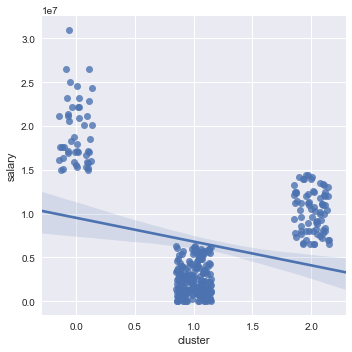

In [35]:
%matplotlib inline
from sklearn.cluster import KMeans

#to start off our data analysis we will use a clustering algorithm to create clusters within our data 
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(df.drop(['player', 'position', 'team'], axis=1))
clus = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1 = df.join(clus)

#now we do analysis to see how our algorithm clustered our data 
sns.lmplot("cluster", "salary", df1, x_jitter=.15, y_jitter=.15)

It appears that our clustering algorithm split the dataset by salary. We will save these clusters for our salary analysis later.

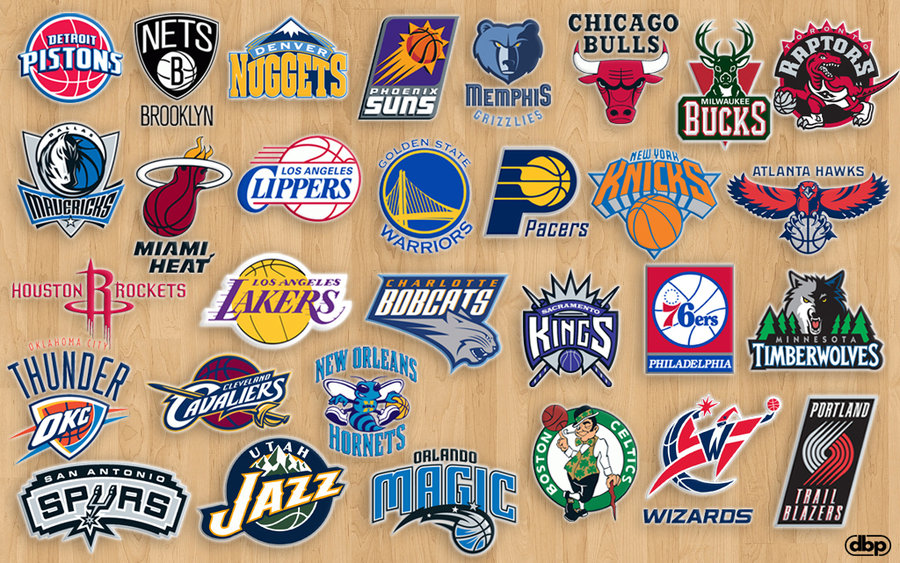

In [36]:
from IPython.display import Image
Image("final_project_nba-master/teams.jpg")

In [37]:
df['team'].describe()

count     340
unique     30
top       UTA
freq       14
Name: team, dtype: object

**30 teams** in the NBA with the **most players** from our data set playing for the **Utah Jazz**.

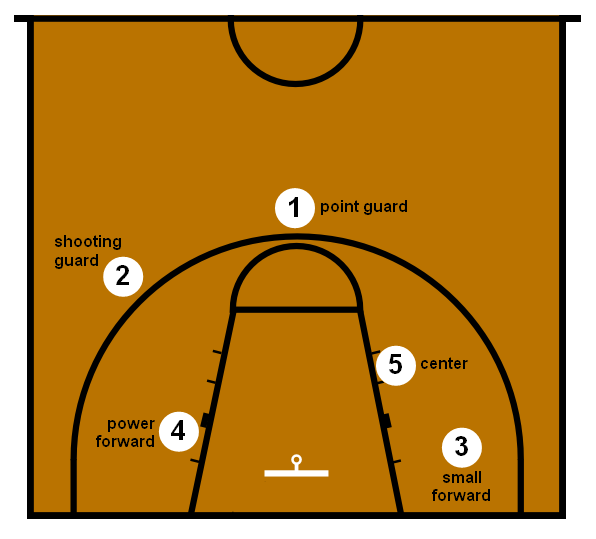

In [38]:
from IPython.display import Image
Image("final_project_nba-master/position.png")

In [39]:
df.groupby('team').size()

team
ATL    11
BOS    13
BRK    12
CHI    12
CHO    14
CLE     9
DAL     9
DEN    14
DET    11
GSW     9
HOU     9
IND    12
LAC    10
LAL    11
MEM    13
MIA    10
MIL    11
MIN    13
NOP    11
NYK     9
OKC     9
ORL    13
PHI    12
PHO    14
POR    11
SAC    11
SAS    13
TOR    12
UTA    14
WAS     8
dtype: int64

This shows the number of players in each team in our dataset.

In [40]:
df['position'].describe()

count     340
unique      5
top        PF
freq       73
Name: position, dtype: object

**5 main positions** with **Power Forward** being the **most frequent** in our dataset with **73** players playing in that position.

In [41]:
df.groupby('position').size()

position
C     68
PF    73
PG    70
SF    59
SG    70
dtype: int64

This shows the number of players playing in each different position.

## Basic Data Visualization

In [42]:
teams = df1.groupby('team').mean().sort_values(by=['salary'])
teams

,age,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,fg3_pct,...,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary,cluster
team,,,,,,,,,,,,,,,,,,,,,
OKC,25.777778,49.111111,33.333333,19.144444,2.655556,5.800000,0.460111,0.655556,1.944444,0.247556,...,2.400000,3.377778,1.088889,0.600000,0.511111,0.744444,1.633333,6.722222,3.370943e+06,1.111111
PHI,24.583333,39.833333,17.166667,20.483333,3.608333,8.025000,0.450500,0.775000,2.258333,0.313667,...,2.966667,4.166667,1.550000,0.458333,0.541667,1.566667,2.016667,9.875000,3.702962e+06,1.250000
MIN,24.846154,60.230769,31.538462,22.238462,3.523077,7.653846,0.443231,0.723077,2.038462,0.282462,...,2.800000,3.838462,2.107692,0.730769,0.423077,1.215385,1.930769,9.476923,4.563934e+06,1.153846
MIA,27.300000,48.900000,21.800000,23.450000,3.650000,8.610000,0.421500,1.080000,2.950000,0.327600,...,2.660000,3.340000,2.550000,0.780000,0.350000,1.330000,1.980000,9.840000,4.823190e+06,0.900000
TOR,23.916667,51.916667,20.750000,17.108333,2.250000,4.933333,0.455917,0.458333,1.400000,0.291500,...,2.358333,3.350000,1.016667,0.616667,0.458333,0.733333,1.708333,5.883333,4.831781e+06,1.250000
PHO,26.071429,47.428571,23.285714,18.750000,2.871429,6.771429,0.397571,0.657143,2.114286,0.271286,...,2.521429,3.364286,1.671429,0.571429,0.335714,1.235714,1.778571,8.050000,5.005938e+06,1.285714
DEN,25.714286,53.928571,26.500000,21.364286,3.535714,7.664286,0.439571,1.007143,2.735714,0.318429,...,2.942857,3.892857,2.207143,0.614286,0.292857,1.228571,1.642857,9.728571,5.081806e+06,1.142857
HOU,26.888889,58.111111,27.777778,21.277778,3.455556,7.166667,0.460444,1.100000,3.022222,0.257333,...,2.688889,3.755556,1.233333,0.577778,0.455556,0.800000,1.766667,9.122222,5.202559e+06,1.111111
BRK,26.750000,53.666667,26.666667,20.208333,3.041667,6.850000,0.426083,0.791667,2.383333,0.319583,...,2.966667,3.825000,2.083333,0.666667,0.450000,1.316667,1.883333,8.425000,5.251762e+06,1.083333


The table above is the teams averages sorted by salary. OKC has the cheapest average salary and CLE has the most expensive. This gives you an **overall view** of the data in the given dataset. We will now move forward and try to find various patterns in the NBA.

### Age

Basketball can be a physically demanding and exhaustive sport requiring much training and playing games back to back on certain weeks. Leading us the question, **does age have an impact on players performance? **

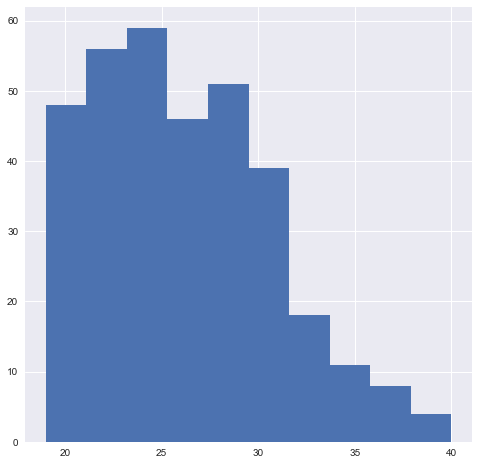

In [43]:
df['age'].hist(figsize=(8,8))

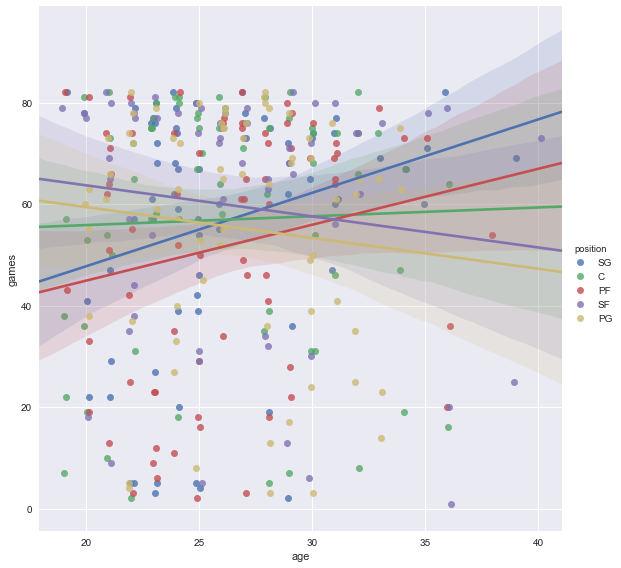

In [44]:
sns.lmplot("age", "games", df, hue="position", x_jitter=.15, size=8)

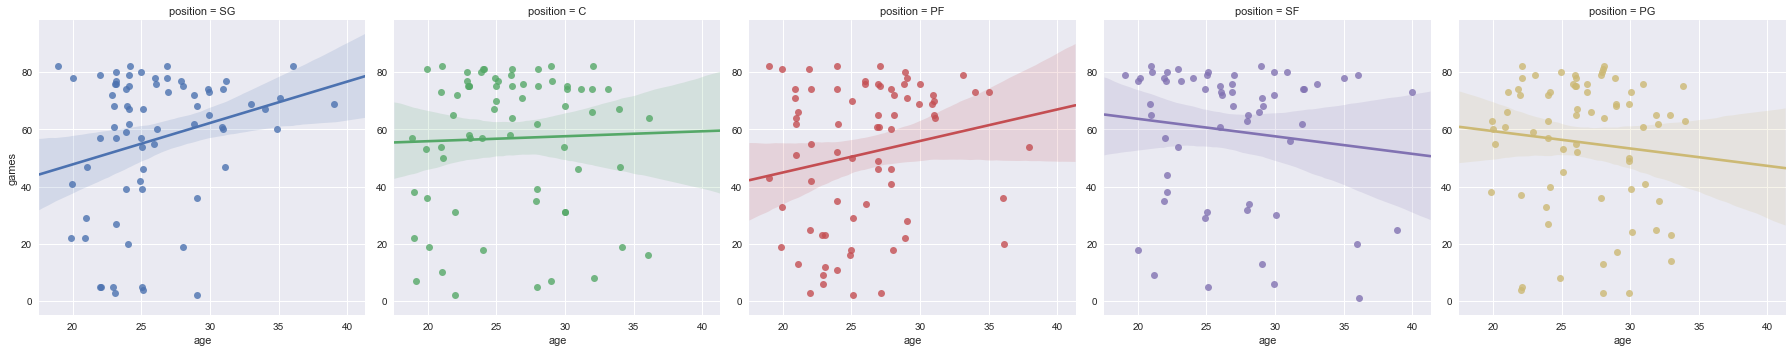

In [45]:
sns.lmplot("age", "games", df, col="position", hue="position", x_jitter=.15, size=5)

This Visualization shows the same chart above it, but split into each position. Giving us a better and more specific look into the data. **Power Forwards and Shooting Guards** play **more games** the **older** they are while **Small Forwards and Point Guards** seem to play **less**. Players playing in the position of **Center** have **little affect** when comparing age with the number of games played.

### Age vs Salary

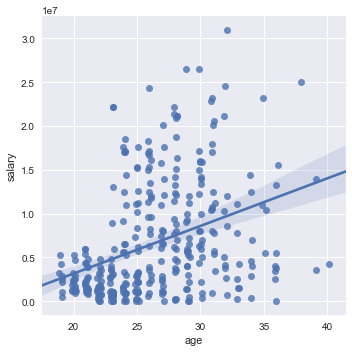

In [46]:
sns.lmplot("age", "salary", df, x_jitter=.15)

The **older the player**, the **higher the salary**. Once again probably due to the experience garnered over the years and higher contribution to the league. 

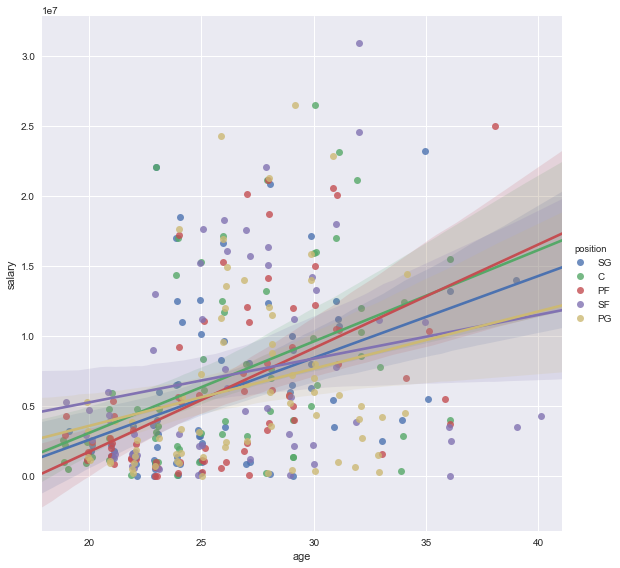

In [47]:
sns.lmplot("age", "salary", df, hue="position", x_jitter=.15, size=8)

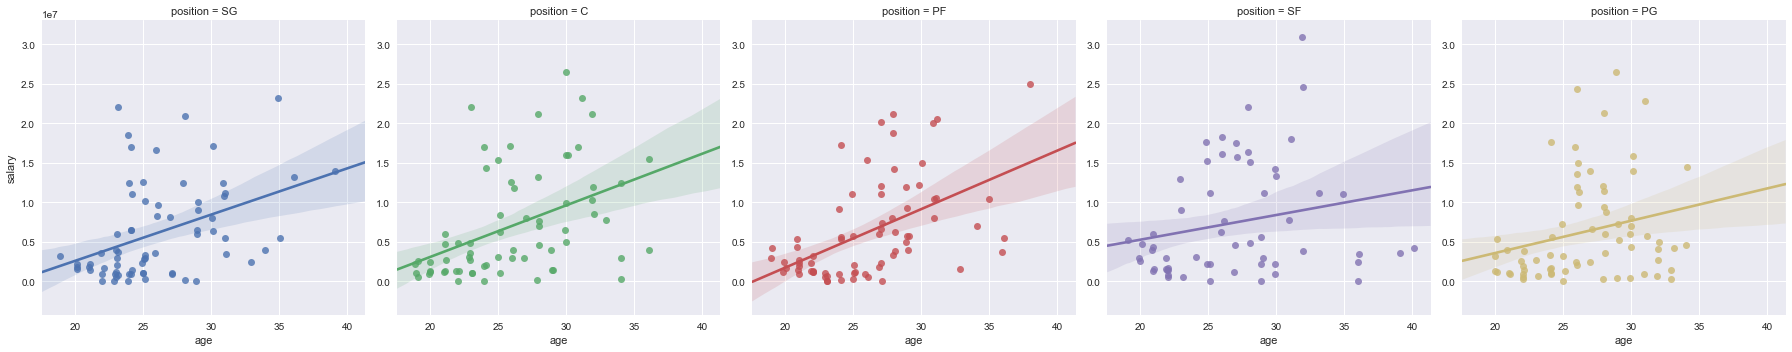

In [48]:
sns.lmplot("age", "salary", df, col="position", hue="position", x_jitter=.15, size=5)

**Older players** in **all 5  positions** in basketball are more likely to get **paid higher in salary**.

### Field Goals vs Field Goal Attempts

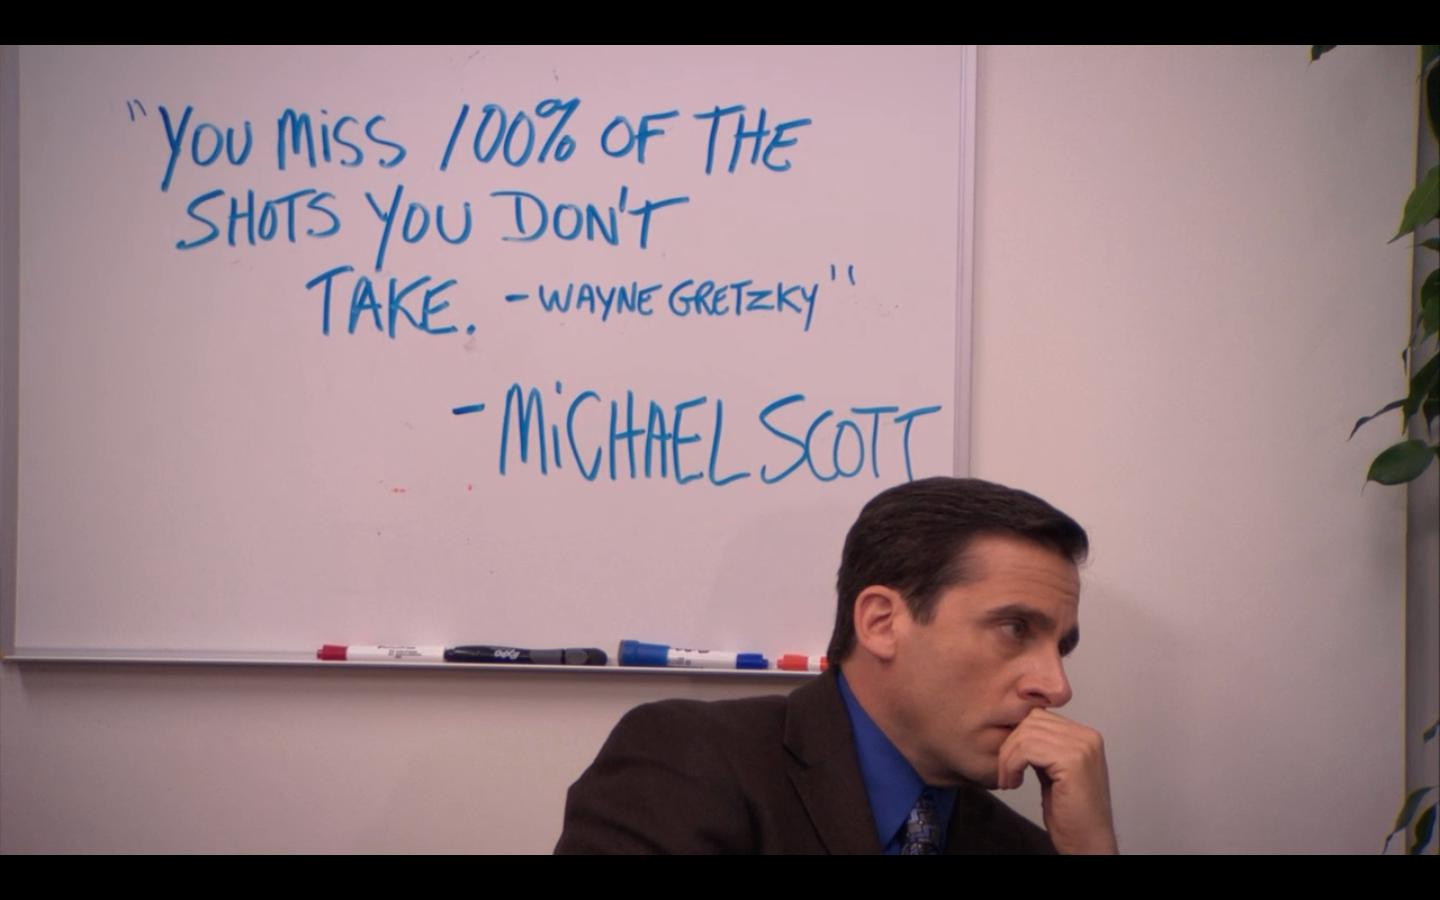

In [49]:
from IPython.display import Image
Image("final_project_nba-master/Missed shots.jpg")

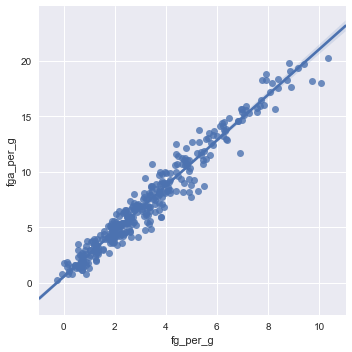

In [50]:
sns.lmplot("fg_per_g", "fga_per_g", df, x_jitter=.30)

This graph shows the relationship between field goals and field goal attempts per game. 

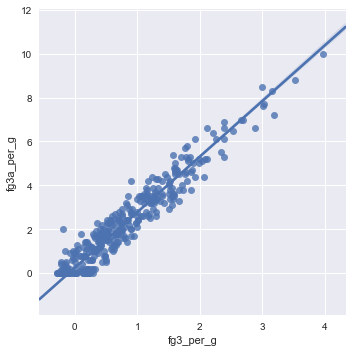

In [51]:
sns.lmplot("fg3_per_g", "fg3a_per_g", df, x_jitter=.30)

Wayne Gretzky (and Michael Scott) are both right about missing all the shots you do not take. The charts above depicting attempts and those made show a positive correlation. Meaning **more shots**, **the better**.

### Negative Impact Stats

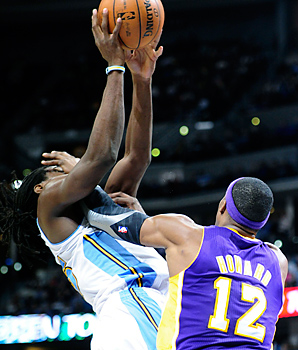

In [52]:
from IPython.display import Image
Image("final_project_nba-master/dwight-howard-flagrant.jpg")

NBA players might have a rough game one night and cause turnover after turnover (losing posession of the ball to the opposing team). Will this cause the player to get frustrated as the night wears on and cause more personal fouls or vice versa?

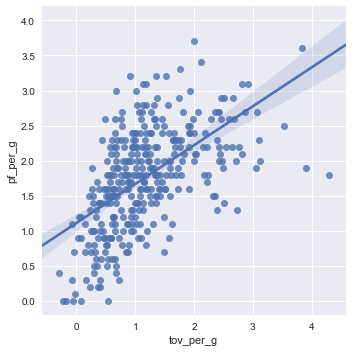

In [53]:
sns.lmplot("tov_per_g", "pf_per_g", df, x_jitter=.30)

The **more turnovers per game**, the **more likely** the player recieved a personal foul in that game as well. Showing that tempers do flare up and in turn cause mistakes to be made. 

### Salary

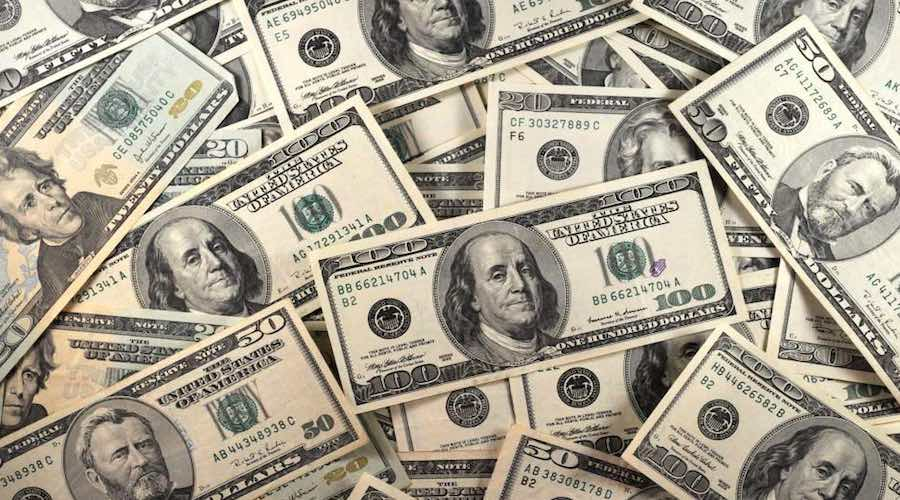

In [54]:
from IPython.display import Image
Image("final_project_nba-master/microsoft-compensate-money.jpg")

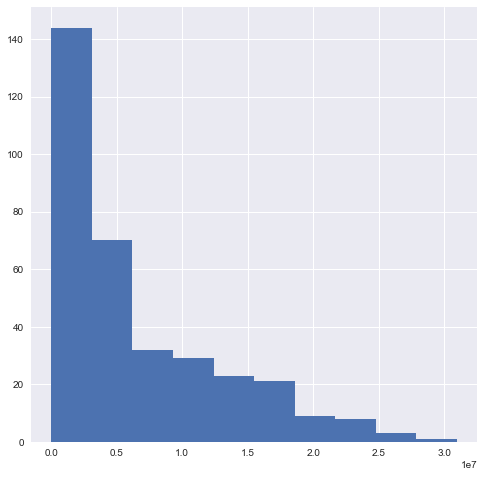

In [55]:
df['salary'].hist(figsize=(8,8))

The NBA is packed with players making millions of dollars each year, but do they really show their worth at the end? We will now try to find if salary affects performance on the court.

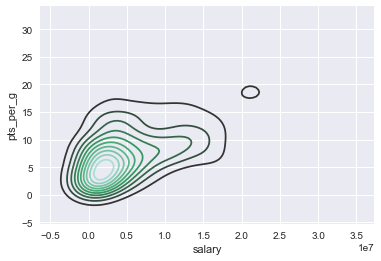

In [56]:
sns.kdeplot(df.salary, df.pts_per_g )

Overall, **better performing players** do **earn higher salaries**. 

In [57]:
## importing low, med, and high salary clusters
low_sal = pd.read_csv("data/low_sal.csv")
med_sal = pd.read_csv("data/med_sal.csv")
high_sal = pd.read_csv("data/high_sal.csv")
low_sal1 = low_sal[['player','position', 'age', 'team', 'salary']]
med_sal1 = med_sal[['player','position', 'age', 'team', 'salary']]
high_sal1 = high_sal[['player','position', 'age', 'team', 'salary']]

In [58]:
def print_sep():
    print("_____________________________________________________________")

In [59]:
# 5 highest earning players in the low salary cluster, the lowest salary in the low cluster, & number of players 
low = low_sal1.sort_values(by=['salary'], ascending=False)

print low.head()
print_sep()
print low.tail(1)
print_sep()
print len(low)

                player position  age team     salary
12     Marco Belinelli       SG   30  CHO  6333333.0
41         Jae Crowder       SF   26  BOS  6286408.0
188       Lance Thomas       PF   28  NYK  6191000.0
17         Tarik Black        C   25  LAL  6191000.0
149  Patrick Patterson       PF   27  TOR  6050000.0
_____________________________________________________________
            player position  age team  salary
101  Dahntay Jones       SF   36  CLE  5767.0
_____________________________________________________________
216


Our **low salary** cluster has a salary range from **5,767** to **6,333,333** and has **216** players

In [60]:
# 5 highest earning players in the medium salary cluster, the lowest salary in the medium cluster, & number of players
med = med_sal1.sort_values(by=['salary'], ascending=False)
print med.head()
print_sep()
print med.tail(1)
print_sep()
print len(med)

               player position  age team      salary
57        Tony Parker       PG   34  SAS  14445313.0
71  Jonas Valanciunas        C   24  TOR  14382023.0
13    DeMarre Carroll       SF   30  TOR  14200000.0
75     Thaddeus Young       PF   28  IND  14153652.0
61        Rajon Rondo       PG   30  CHI  14000000.0
_____________________________________________________________
        player position  age team     salary
8  Aron Baynes        C   30  DET  6500000.0
_____________________________________________________________
76


Our **medium salary** cluster has a salary range from **6,500,000** to **14,445,313** and has **76** players

In [61]:
# 10 highest earning players in the high salary cluster, the lowest salary in the high cluster, & number of players
high = high_sal1.sort_values(by=['salary'], ascending=False)
print high.head(10)
print_sep()
print high.tail(1)
print_sep()
print len(high)

             player position  age team      salary
27     LeBron James       SF   32  CLE  30963450.0
23       Al Horford        C   30  BOS  26540100.0
8       Mike Conley       PG   29  MEM  26540100.0
39    Dirk Nowitzki       PF   38  DAL  25000000.0
2   Carmelo Anthony       SF   32  NYK  24559380.0
29   Damian Lillard       PG   26  POR  24328425.0
46      Dwyane Wade       SG   35  CHI  23200000.0
24    Dwight Howard        C   31  ATL  23180275.0
41       Chris Paul       PG   31  LAC  22868827.0
5      Bradley Beal       SG   23  WAS  22116750.0
_____________________________________________________________
            player position  age team      salary
26  Reggie Jackson       PG   26  DET  14956522.0
_____________________________________________________________
48


Our **high salary** cluster has a salary range from **14,956,522** to **30,963,450** and has **48** players

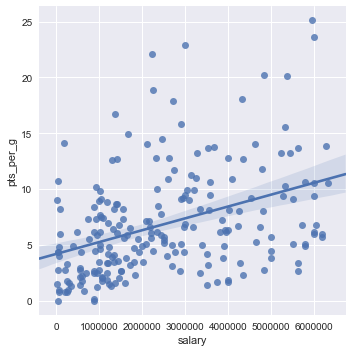

In [62]:
sns.lmplot("salary", "pts_per_g", low_sal, x_jitter=.15)

Many of the players on the **lower** end of salaries in the NBA make less than 5 points per game.

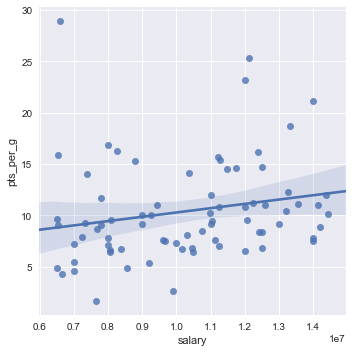

In [63]:
sns.lmplot("salary", "pts_per_g", med_sal, x_jitter=.15)

Few players make less than 5 points per game. Only 4 players make more than 20 points per game in the medium salary cluster.

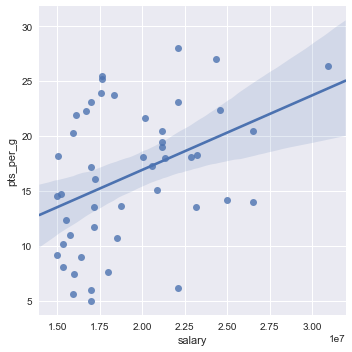

In [64]:
sns.lmplot("salary", "pts_per_g", high_sal, x_jitter=.15)

All NBA players on the high salary cluster score **more than 5 points per game**. Many scoring above the 20 point mark per game.

# Regression

In [65]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from bokeh.models import Jitter

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

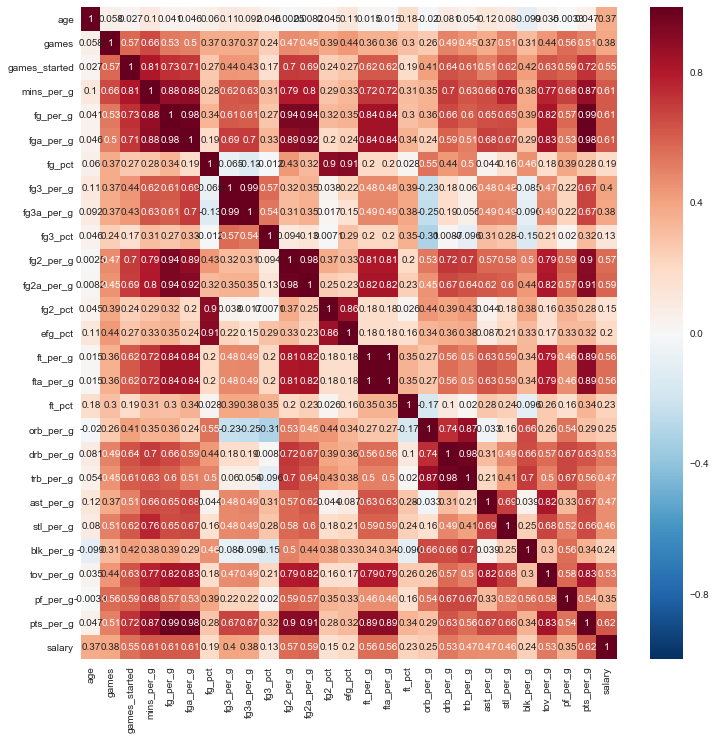

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [67]:
# Ridge for all data
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [68]:
from datacleaner import autoclean
#my_clean_data = autoclean(my_data, drop_nans=True)
my_clean_data = autoclean(df)

my_clean_data.head()

,player,position,age,team,games,games_started,mins_per_g,fg_per_g,fga_per_g,fg_pct,...,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,salary
0,8,4,23,20,68,6,15.5,2.0,5.0,0.393,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,5994764.0
1,301,0,23,20,80,80,29.9,4.7,8.2,0.571,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,3140517.0
2,23,4,31,25,61,45,25.9,3.0,6.9,0.440,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,12500000.0
3,11,0,28,18,39,15,15.0,2.3,4.6,0.500,...,1.2,3.4,4.5,0.3,0.5,0.6,0.8,2.0,5.3,4638203.0
4,51,0,28,17,62,0,8.6,0.7,1.4,0.523,...,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,7643979.0


In [69]:
df = my_clean_data.drop('player', axis = 1)

In [70]:
df = df.drop('position', axis = 1)
df= df.drop('team', axis = 1)

In [71]:
#assigning columns to X and Y variables
y = df['salary'] 
X = df.drop(['salary'], axis =1)
reg = linear_model.Ridge (alpha = .1)
reg.fit(X,y) 
reg_y = reg.predict(X)
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
print reg.coef_

print reg.intercept_ 
print_sep()
print "mean square error: ", mean_squared_error(y, reg_y)
print_sep()
print "variance or r-squared: ", explained_variance_score(y, reg_y)

[  442453.57773374    21319.39061246    32075.34666275   -13971.94185445
  7354206.20921964  6779565.08079137  2240477.83135842  5685347.73364795
 -8771136.41318418 -4673803.94461561 -5962785.74663163 -4872568.6762146
  2831257.13808087 -3059720.77855792  1455728.03090258  1455728.0309026
 -1359050.0440289  -7239233.468158   -5453116.18650643  6719730.85217346
   358204.99011879  -328114.07264257   137058.95244049  -816215.7260332
  -994390.95505231 -2197451.84809573]
-10216530.362
_____________________________________________________________
mean square error:  1.71426839631e+13
_____________________________________________________________
variance or r-squared:  0.587851393834


In [72]:
y = df['salary'] 
X = df.drop(['salary'], axis =1)
reg = linear_model.Lasso(alpha = 0.1)        #higher alpha (penality parameter), fewer predictors
reg.fit(X, y)
reg_y = reg.predict(X)
print 'Coefficients: ', reg.coef_
print "y-intercept ", reg.intercept_
print "mean square error: ", mean_squared_error(y, reg_y)
print "variance or r-squared: ", explained_variance_score(y, reg_y)

Coefficients:  [  4.43755098e+05   2.24844746e+04   3.18951065e+04   2.00394729e+03
   2.47695427e+06   5.54502234e+05   8.49670953e+06   5.78299361e+06
  -2.82051896e+06  -4.17282712e+06  -4.81870956e+06   1.28097803e+06
   4.28590190e+06  -1.10620937e+07   1.00972610e+06   1.27641911e-07
  -1.28150411e+06  -3.90221732e+06  -2.11932883e+06   3.38851523e+06
   3.65870602e+05  -3.59183711e+05  -4.26626163e+03  -7.77923953e+05
  -1.15518394e+06  -3.17889971e+05]
y-intercept  -9785763.93312
mean square error:  1.73893218812e+13
variance or r-squared:  0.581921664604


/Users/hoffmanbrandon1/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [73]:
# The rank of features
y = df['salary'] 
X = df.drop(['salary'], axis =1)
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'fg3a_per_g'), (1, 'fga_per_g'), (2, 'fg2a_per_g'), (3, 'orb_per_g'), (4, 'trb_per_g'), (5, 'drb_per_g'), (6, 'fg2_per_g'), (7, 'fg_per_g'), (8, 'fg3_pct'), (9, 'efg_pct'), (10, 'fg_pct'), (11, 'fg2_pct'), (12, 'fg3_per_g'), (13, 'fta_per_g'), (14, 'pts_per_g'), (15, 'ft_per_g'), (16, 'ft_pct'), (17, 'pf_per_g'), (18, 'tov_per_g'), (19, 'ast_per_g'), (20, 'age'), (21, 'blk_per_g'), (22, 'stl_per_g'), (23, 'games_started'), (24, 'games'), (25, 'mins_per_g')]


In [74]:
x = df[['fg3a_per_g','fg2a_per_g','trb_per_g', 'ast_per_g','ft_per_g','age','games']]
Y = df['salary'] 
model1 = lm.LinearRegression()
model1.fit(x, Y)   
model1_y = model1.predict(x)
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in x.columns ]
zip(xcolumns, coef)
print "mean square error: ", mean_squared_error(y, model1_y)
print_sep()
print "variance or r-squared: ", explained_variance_score(y, model1_y)
print_sep()
print 'Coefficients: ', model1.coef_
print_sep()
print "y-intercept ", model1.intercept_

mean square error:  1.95912570599e+13
_____________________________________________________________
variance or r-squared:  0.528982199774
_____________________________________________________________
Coefficients:  [ 480967.77544099  452688.48951739  533417.26857765  268069.95298421
  559049.64987587  485252.49473052   12567.73927572]
_____________________________________________________________
y-intercept  -13642969.5923


In [75]:
x = df[['fg_pct','pts_per_g','trb_per_g', 'ast_per_g','tov_per_g','age','games']]
Y = df['salary'] 
model1 = lm.LinearRegression()
model1.fit(x, Y)   
model1_y = model1.predict(x)
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in x.columns ]
zip(xcolumns, coef)
print "mean square error: ", mean_squared_error(y, model1_y)
print_sep()
print "variance or r-squared: ", explained_variance_score(y, model1_y)
print_sep()
print 'Coefficients: ', model1.coef_
print_sep()
print "y-intercept ", model1.intercept_

mean square error:  1.95412550367e+13
_____________________________________________________________
variance or r-squared:  0.530184360661
_____________________________________________________________
Coefficients:  [-5644648.79798746   500550.80719975   662849.17998891   551719.56860633
 -1044656.3942561    474165.87952819    13407.44429107]
_____________________________________________________________
y-intercept  -10988902.4069


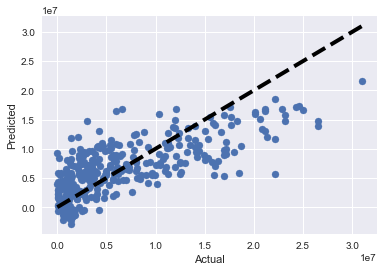

In [76]:
#visualize actural vs. predictive using scatter plot
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [77]:
runs_reg_model1 = sm.ols("salary~fg3a_per_g+fg2_per_g+trb_per_g+ast_per_g+ft_per_g+age+games",df)
runs_reg = runs_reg_model1.fit()
print runs_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     51.74
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           1.46e-49
Time:                        15:05:41   Log-Likelihood:                -5688.1
No. Observations:                 340   AIC:                         1.139e+04
Df Residuals:                     332   BIC:                         1.142e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.336e+07   1.58e+06     -8.441      0.0

In [78]:
runs_reg_model1 = sm.ols("salary~fg_pct+pts_per_g+trb_per_g+ast_per_g+tov_per_g+age+games",df)
runs_reg = runs_reg_model1.fit()
print runs_reg.summary()

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     53.52
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           7.89e-51
Time:                        15:05:41   Log-Likelihood:                -5685.0
No. Observations:                 340   AIC:                         1.139e+04
Df Residuals:                     332   BIC:                         1.142e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.099e+07   1.89e+06     -5.812      0.0

In [79]:
# Lasso
from sklearn import linear_model
from sklearn.linear_model import Lasso
x = df[['fg_pct','pts_per_g','trb_per_g', 'ast_per_g','tov_per_g','age','games']]
Y = df['salary'] 
reg = linear_model.Lasso(alpha = 0.1)        #higher alpha (penality parameter), fewer predictors
reg.fit(x, Y)
reg_y = reg.predict(x)
print "mean square error: ", mean_squared_error(Y, reg_y)
print_sep()
print "variance or r-squared: ", explained_variance_score(Y, reg_y)

mean square error:  1.95412550367e+13
_____________________________________________________________
variance or r-squared:  0.530184360661


In [80]:
#selec only 2 X variables
y = df['salary'] 
X = df.drop(['salary'], axis =1)
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)
print "mean square error: ", mean_squared_error(y, model2_y)
print_sep()
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  2.56755584819e+13
_____________________________________________________________
variance or r-squared:  0.382701934912
